In [3]:
import pandas as pd
import numpy as np

data = pd.DataFrame({
    'x0': [1,2,3,4,5],
    'x1': [0.01, -0.01, 0.25, -4.1, 0.0],
    'y':  [-1.5, 0, 3.6, 1.3, -2]
})

data

,x0,x1,y
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-2.0


In [5]:
data.columns

Index(['x0', 'x1', 'y'], dtype='object')

In [6]:
data.values

array([[ 1.  ,  0.01, -1.5 ],
       [ 2.  , -0.01,  0.  ],
       [ 3.  ,  0.25,  3.6 ],
       [ 4.  , -4.1 ,  1.3 ],
       [ 5.  ,  0.  , -2.  ]])

In [9]:
model_cols = ['x0', 'x1']
data.loc[:, model_cols].values

array([[ 1.  ,  0.01],
       [ 2.  , -0.01],
       [ 3.  ,  0.25],
       [ 4.  , -4.1 ],
       [ 5.  ,  0.  ]])

y ~ x0 + x1

In [10]:
import patsy

In [13]:
y, X = patsy.dmatrices('y ~ x0 + x1', data)

In [14]:
y

DesignMatrix with shape (5, 1)
     y
  -1.5
   0.0
   3.6
   1.3
  -2.0
  Terms:
    'y' (column 0)

In [15]:
X

DesignMatrix with shape (5, 3)
  Intercept  x0     x1
          1   1   0.01
          1   2  -0.01
          1   3   0.25
          1   4  -4.10
          1   5   0.00
  Terms:
    'Intercept' (column 0)
    'x0' (column 1)
    'x1' (column 2)

In [16]:
patsy.dmatrices('y ~ x0 + x1 + 0', data)[1]

DesignMatrix with shape (5, 2)
  x0     x1
   1   0.01
   2  -0.01
   3   0.25
   4  -4.10
   5   0.00
  Terms:
    'x0' (column 0)
    'x1' (column 1)

In [17]:
coef, reid, _, _, = np.linalg.lstsq(X, y)

/Users/michaelfclarke/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [18]:
coef

array([[ 0.31290976],
       [-0.07910564],
       [-0.26546384]])

In [19]:
coef = pd.Series(coef.squeeze(), index=X.design_info.column_names)

In [20]:
coef

Intercept    0.312910
x0          -0.079106
x1          -0.265464
dtype: float64

In [21]:
y, X = patsy.dmatrices('y ~ np.log(np.abs(x1) + 1)', data)

In [22]:
X

DesignMatrix with shape (5, 2)
  Intercept  np.log(np.abs(x1) + 1)
          1                 0.00995
          1                 0.00995
          1                 0.22314
          1                 1.62924
          1                 0.00000
  Terms:
    'Intercept' (column 0)
    'np.log(np.abs(x1) + 1)' (column 1)

In [23]:
y, X = patsy.dmatrices(' y ~ standardize(x0) + center(x1)', data)

In [24]:
X

DesignMatrix with shape (5, 3)
  Intercept  standardize(x0)  center(x1)
          1         -1.41421        0.78
          1         -0.70711        0.76
          1          0.00000        1.02
          1          0.70711       -3.33
          1          1.41421        0.77
  Terms:
    'Intercept' (column 0)
    'standardize(x0)' (column 1)
    'center(x1)' (column 2)

In [25]:
data

,x0,x1,y
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-2.0


In [26]:
new_data = pd.DataFrame({
    'x0': [6, 7, 8, 9],
    'x1': [3.1, -0.5, 0.0, 2.3],
    'y': [1,2,3,4]
})

new_data

,x0,x1,y
0,6,3.1,1
1,7,-0.5,2
2,8,0.0,3
3,9,2.3,4


In [27]:
new_X = patsy.build_design_matrices([X.design_info], new_data)

In [28]:
new_X

[DesignMatrix with shape (5, 3)
   Intercept  standardize(x0)  center(x1)
           1         -1.41421        0.78
           1         -0.70711        0.76
           1          0.00000        1.02
           1          0.70711       -3.33
           1          1.41421        0.77
   Terms:
     'Intercept' (column 0)
     'standardize(x0)' (column 1)
     'center(x1)' (column 2)]

In [29]:
y, X = patsy.dmatrices('y ~ I(x0 + x1)', data)

In [30]:
X

DesignMatrix with shape (5, 2)
  Intercept  I(x0 + x1)
          1        1.01
          1        1.99
          1        3.25
          1       -0.10
          1        5.00
  Terms:
    'Intercept' (column 0)
    'I(x0 + x1)' (column 1)

In [31]:
dir(patsy.builtins)

['C',
 'ContrastMatrix',
 'Diff',
 'Helmert',
 'I',
 'Poly',
 'Q',
 'Sum',
 'Treatment',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'bs',
 'cc',
 'center',
 'cr',
 'scale',
 'standardize',
 'te',
 'test_I',
 'test_Q']

In [33]:
print(patsy.builtins.Q.__doc__)

A way to 'quote' variable names, especially ones that do not otherwise
    meet Python's variable name rules.

    If ``x`` is a variable, ``Q("x")`` returns the value of ``x``. (Note that
    ``Q`` takes the *string* ``"x"``, not the value of ``x`` itself.) This
    works even if instead of ``x``, we have a variable name that would not
    otherwise be legal in Python.

    For example, if you have a column of data named ``weight.in.kg``, then you
    can't write::

      y ~ weight.in.kg

    because Python will try to find a variable named ``weight``, that has an
    attribute named ``in``, that has an attribute named ``kg``. (And worse
    yet, ``in`` is a reserved word, which makes this example doubly broken.)
    Instead, write::

      y ~ Q("weight.in.kg")

    and all will be well. Note, though, that this requires embedding a Python
    string inside your formula, which may require some care with your quote
    marks. Some standard options include::

      my_fit_function("y ~

In [34]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [35]:
np.random.seed(12345)

In [37]:
def dnorm(mean, variance, size=1):
    if isinstance(size, int):
        size = (size,)
    return mean + np.sqrt(variance) * np.random.randn(*size)

N = 100
X = np.c_[dnorm(0, 0.4, size=N),
           dnorm(0, 0.6, size=N),
           dnorm(0, 0.2, size=N)]

In [39]:
eps = dnorm(0, 0.1, size=N)
beta = [0.1, 0.3, 0.5]

y = np.dot(X, beta) + eps

In [40]:
X[:5]

array([[ 1.10504756,  0.72933793, -0.34070396],
       [-0.89191798,  0.41314194, -0.14830359],
       [-0.23922094,  0.27596261, -0.78321207],
       [-0.21871619, -0.00783529,  0.28125   ],
       [ 0.24037261,  1.09663769,  0.12633867]])

In [41]:
y[:5]

array([ 0.16396683,  0.30451354, -0.53235585,  0.1092278 ,  0.63309197])

In [42]:
X_model = sm.add_constant(X)
X_model[:5]

array([[ 1.        ,  1.10504756,  0.72933793, -0.34070396],
       [ 1.        , -0.89191798,  0.41314194, -0.14830359],
       [ 1.        , -0.23922094,  0.27596261, -0.78321207],
       [ 1.        , -0.21871619, -0.00783529,  0.28125   ],
       [ 1.        ,  0.24037261,  1.09663769,  0.12633867]])

In [43]:
model = sm.OLS(y, X)

In [45]:
result = model.fit()
result.params

array([0.1470744 , 0.31401458, 0.40326884])

In [46]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.522
Model:                            OLS   Adj. R-squared (uncentered):              0.508
Method:                 Least Squares   F-statistic:                              35.36
Date:                Tue, 28 Apr 2020   Prob (F-statistic):                    1.58e-15
Time:                        21:12:28   Log-Likelihood:                         -22.358
No. Observations:                 100   AIC:                                      50.72
Df Residuals:                      97   BIC:                                      58.53
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [47]:
data = pd.DataFrame(X, columns=['col1','col2','col3'])
data['y'] = y

In [48]:
data

,col1,col2,col3,y
0,1.105048,0.729338,-0.340704,0.163967
1,-0.891918,0.413142,-0.148304,0.304514
2,-0.239221,0.275963,-0.783212,-0.532356
3,-0.218716,-0.007835,0.281250,0.109228
4,0.240373,1.096638,0.126339,0.633092
...,...,...,...,...
95,0.082916,-0.043931,-0.056381,-0.347560
96,-0.441210,1.782095,0.178083,0.639597
97,0.844739,0.441131,0.063343,-0.284052
98,-0.095525,1.153692,-0.118128,0.132538


In [49]:
result = smf.ols('y ~ col1 + col2 + col3', data).fit()

In [50]:
result.params

Intercept    0.020852
col1         0.143995
col2         0.314090
col3         0.404407
dtype: float64

In [51]:
result.tvalues

Intercept    0.673003
col1         3.227764
col2         7.768473
col3         5.310947
dtype: float64

In [52]:
result.predict(data[:5])

0    0.271269
1   -0.037790
2   -0.243653
3    0.100637
4    0.451001
dtype: float64

In [55]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split

In [56]:
iris = datasets.load_iris()

In [57]:
from sklearn import svm
model = svm.SVC(kernel='linear')

In [58]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [59]:
test_set, train_set, test_results, train_results = train_test_split(iris.data, iris.target)

In [60]:
test_set

array([[6.3, 2.5, 5. , 1.9],
       [6.4, 3.2, 4.5, 1.5],
       [6.4, 2.7, 5.3, 1.9],
       [5.3, 3.7, 1.5, 0.2],
       [7.7, 3. , 6.1, 2.3],
       [5.5, 2.4, 3.8, 1.1],
       [7.7, 2.6, 6.9, 2.3],
       [5.1, 3.7, 1.5, 0.4],
       [5.1, 2.5, 3. , 1.1],
       [5.6, 3. , 4.1, 1.3],
       [6. , 2.9, 4.5, 1.5],
       [5.7, 2.6, 3.5, 1. ],
       [6.4, 3.2, 5.3, 2.3],
       [4.9, 3.6, 1.4, 0.1],
       [5. , 2.3, 3.3, 1. ],
       [4.8, 3. , 1.4, 0.3],
       [6.1, 2.6, 5.6, 1.4],
       [6.7, 3.1, 4.4, 1.4],
       [5.6, 2.7, 4.2, 1.3],
       [6.7, 3.1, 4.7, 1.5],
       [5.7, 3. , 4.2, 1.2],
       [4.7, 3.2, 1.3, 0.2],
       [6.3, 2.9, 5.6, 1.8],
       [7.1, 3. , 5.9, 2.1],
       [6.8, 2.8, 4.8, 1.4],
       [6. , 2.7, 5.1, 1.6],
       [4.8, 3.1, 1.6, 0.2],
       [5.1, 3.8, 1.5, 0.3],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3.2, 1.3, 0.2],
       [6.3, 3.3, 4.7, 1.6],
       [6.1, 2.9, 4.7, 1.4],
       [6.7, 3. , 5. , 1.7],
       [6.9, 3.2, 5.7, 2.3],
       [5. , 3

In [61]:
test_results

array([2, 1, 2, 0, 2, 1, 2, 0, 1, 1, 1, 1, 2, 0, 1, 0, 2, 1, 1, 1, 1, 0,
       2, 2, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 2, 1, 1, 0, 1, 2,
       1, 2, 2, 2, 0, 0, 1, 0, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 1, 1,
       0, 0, 2, 2, 2, 1, 0, 1, 2, 2, 2, 0, 1, 0, 0, 0, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1,
       1, 0])

In [64]:
model.fit(train_set, train_results)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [65]:
result = model.predict(test_set)

In [66]:
result == test_results

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [67]:
(result == test_results).mean()

0.9732142857142857

In [71]:
from sklearn.linear_model import LogisticRegressionCV

model = LogisticRegressionCV(10)

model.fit(train_set, train_results)

/Users/michaelfclarke/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/michaelfclarke/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [72]:
result = model.predict(test_set)

In [73]:
(result == test_results).mean()

0.7767857142857143

In [78]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, train_set, train_results, cv=4)
scores

/Users/michaelfclarke/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/michaelfclarke/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/michaelfclarke/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/michaelfclarke/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explici

array([0.90909091, 1.        , 0.88888889, 0.88888889])

In [80]:
from sklearn.model_selection import cross_val_predict
result = cross_val_predict(model, test_set, test_results, cv=2)
result

/Users/michaelfclarke/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/michaelfclarke/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/michaelfclarke/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/michaelfclarke/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explici

array([2, 1, 2, 0, 2, 1, 2, 0, 1, 1, 1, 1, 2, 0, 1, 0, 2, 1, 1, 1, 1, 0,
       2, 2, 1, 2, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 1, 0, 2, 1, 1, 0, 1, 2,
       1, 2, 2, 2, 0, 0, 2, 0, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 1, 1,
       0, 0, 2, 2, 2, 1, 0, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1,
       1, 0])

In [81]:
(result == test_results).mean()

0.9553571428571429

[]

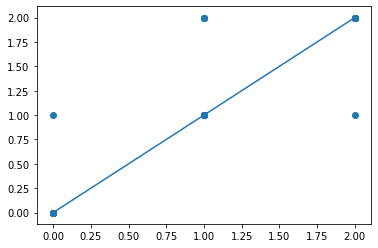

In [90]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(test_results, result)
ax.plot([test_results.min(), test_results.max()], [test_results.min(),test_results.max()])
ax.plot()

In [87]:
plt.show()

In [91]:
from sklearn import datasets
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_svmlight_format',
 'base',
 'california_housing',
 'clear_data_home',
 'covtype',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_mldata',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'kddcup99',
 'lfw',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_classification',
 'make_friedman1',
 'make_friedman2',
 'make_friedman3',
 'make_gaussian_quantiles',
 'make_hastie_10_2',
 'make_low_ran

In [95]:
dbs = datasets.load_diabetes()

In [96]:
dbs

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [97]:
print(dbs['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra